<h1>Pre Precessing study of stock data</h1>

<h2>Author: Danilo Filippo Reiszel Pereira</h2>
<h4>Univesidade Federal do Rio de Janeiro</h4>

<h2>Libraries imports</h2>

In [2]:
import sys, os
sys.path.append('/home/danilofrp/projeto_final/neural-stocks/src')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyTaLib.indicators import *
from neuralstocks.dataacquisition import *
from neuralstocks.preprocessing import *
from neuralstocks.plots import *
from neuralstocks.utils import *

%matplotlib inline

<h3>Overall Params</h3>

In [3]:
dataPath = '/home/danilofrp/projeto_final/data'
assetType = 'stocks'
asset = 'PETR4'
frequency = 'diario'

filePath = dataPath + '/' + assetType + '/' + asset + '/' + frequency + '/' + asset + '.CSV'

decomposeModel = 'additive'

saveDir = '/home/danilofrp/projeto_final/results/preprocessing/misc'
if not os.path.exists(saveDir):
    os.makedirs(saveDir)
saveFormat = 'png'

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

<h3>Data acquisiton and plot</h3>

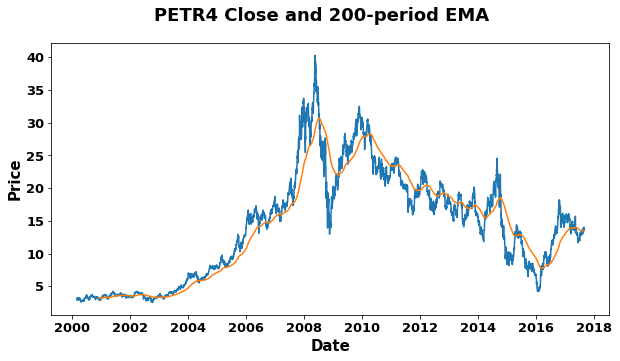

In [4]:
df = acquireData(filePath = filePath,
                 replicateForHolidays = True,
                 meanStdLen = 20,
                 returnCalcParams = [['Close'], ['Close', 'Open']],
                 EMAparams = [{'column': 'Close', 'lenght': 17}, 
                              {'column': 'Close', 'lenght': 72}, 
                              {'column': 'Close', 'lenght': 200}, 
                              {'column': 'Volume', 'lenght': 21}],
                 MACDParams = [{'fast_lenght': 12, 'slow_lenght': 26, 'signal_lenght': 9}],
                 BBParams = [{'lenght': 20}],
                 OBVParams = [{'lenght': None}])

plotSeries(df[['Close', 'Close_EMA200']], title = '{} Close and 200-period EMA'.format(asset), ylabel = 'Price')

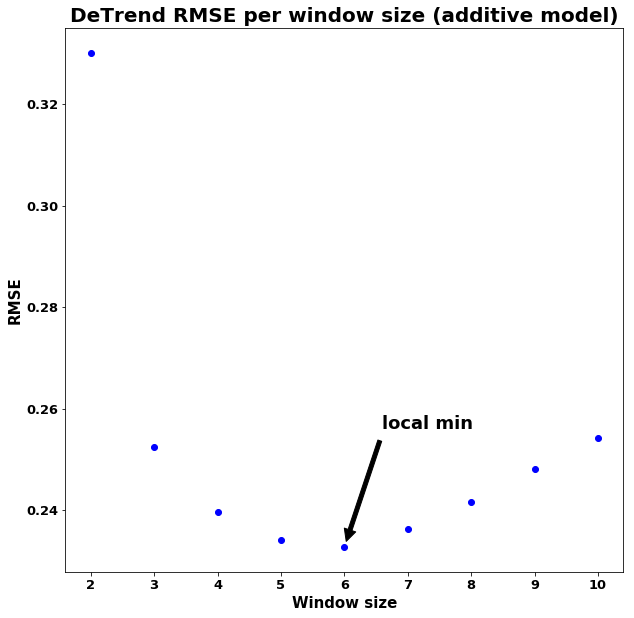

In [5]:
deTrendRMSE(df, column = 'Close', model = decomposeModel, windowMaxSize = 10, weightModel = 'window_acorr', weightModelWindow = 25)

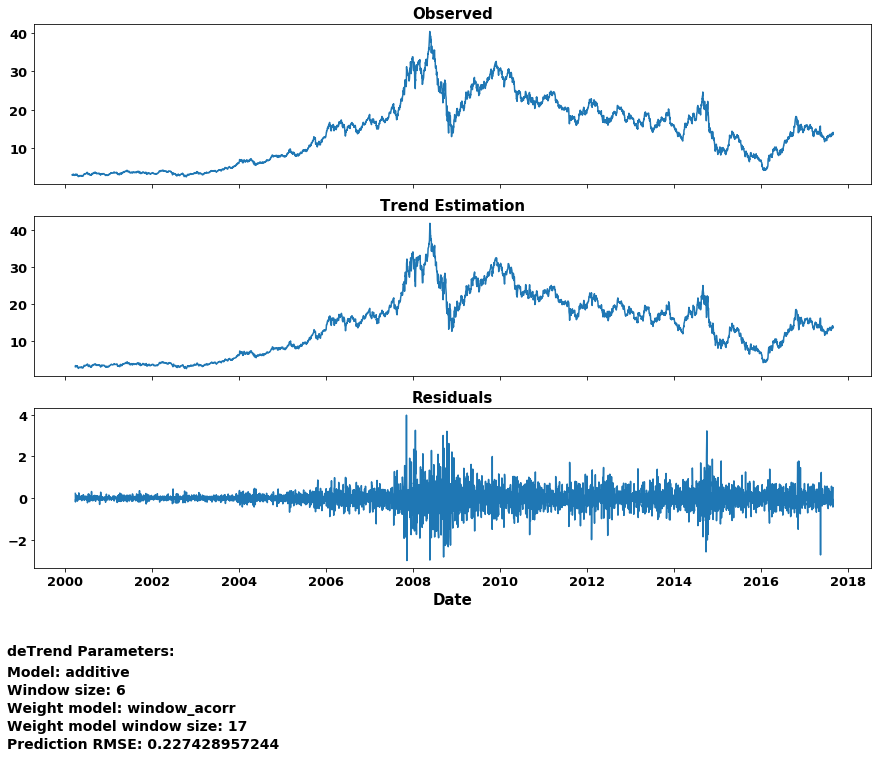

In [6]:
deTrend(df, column = 'Close', window = 6, model = decomposeModel, weightModel = 'window_acorr', weightModelWindow = 17, 
        plot = True, detailed = True)

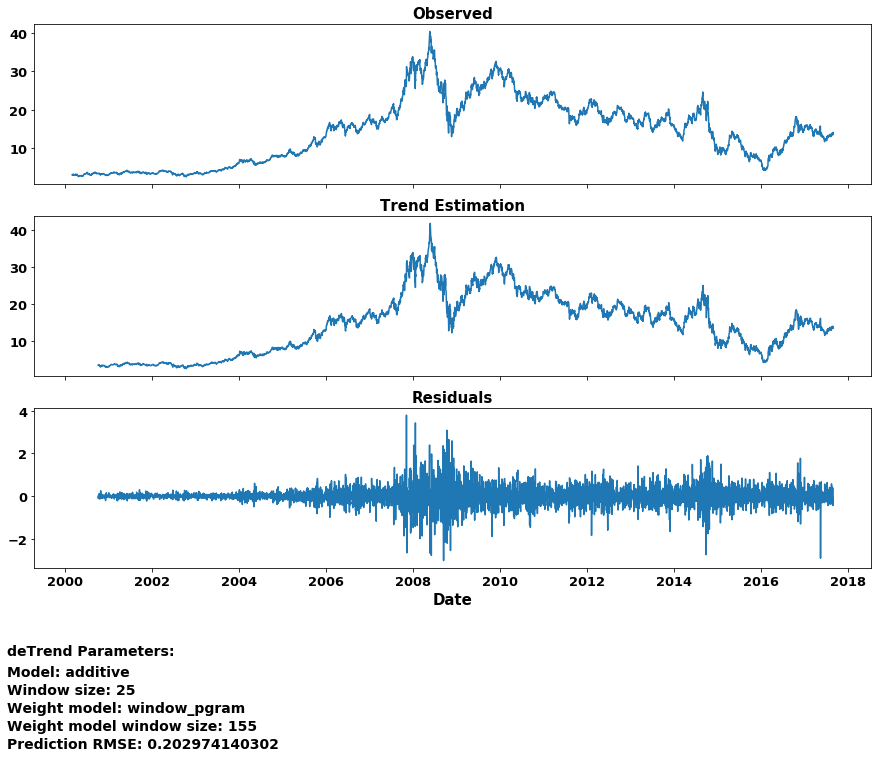

In [5]:
deTrend(df, column = 'Close', window = 25, model = decomposeModel, weightModel = 'window_pgram', weightModelWindow = 155, 
        plot = True, detailed = True)

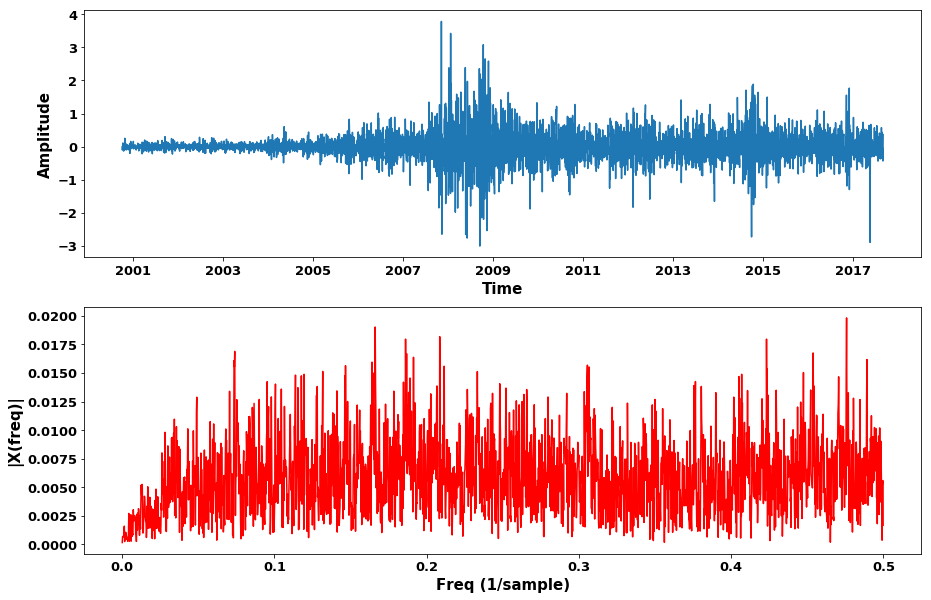

In [6]:
plotFFT(df['Close_resid'])

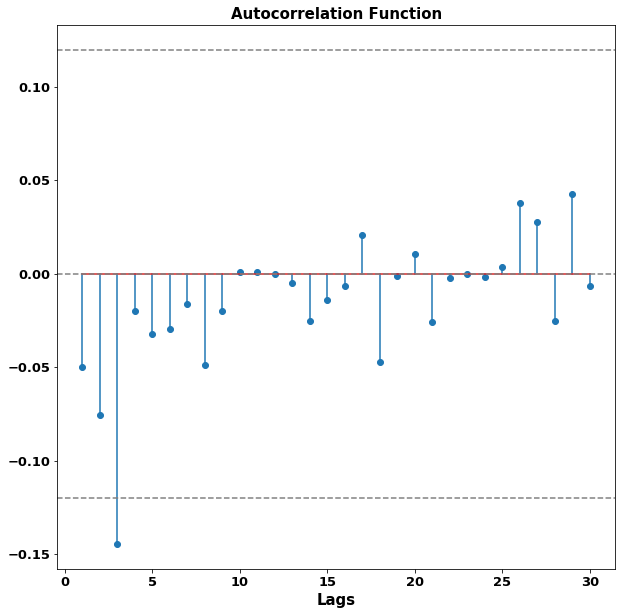

In [7]:
plotAcf(df['Close_resid'], lags = 30)

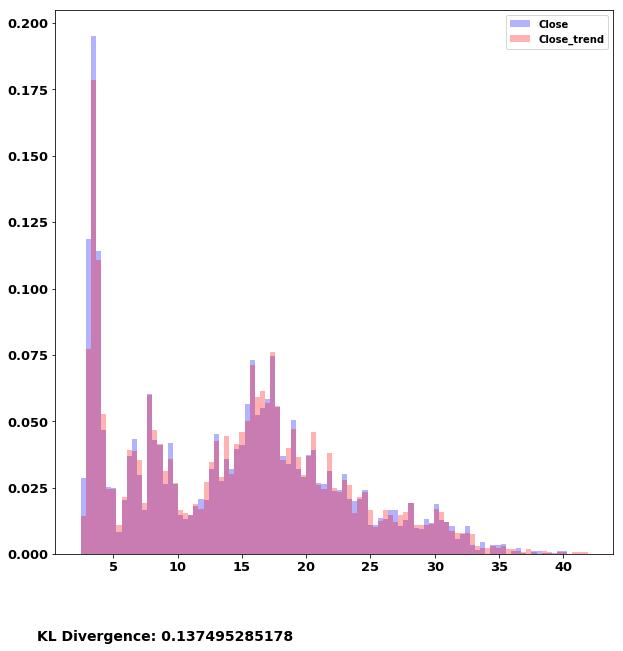

In [8]:
histogram([df['Close'], df['Close_trend']], colors = ['b', 'r'], nBins=100)

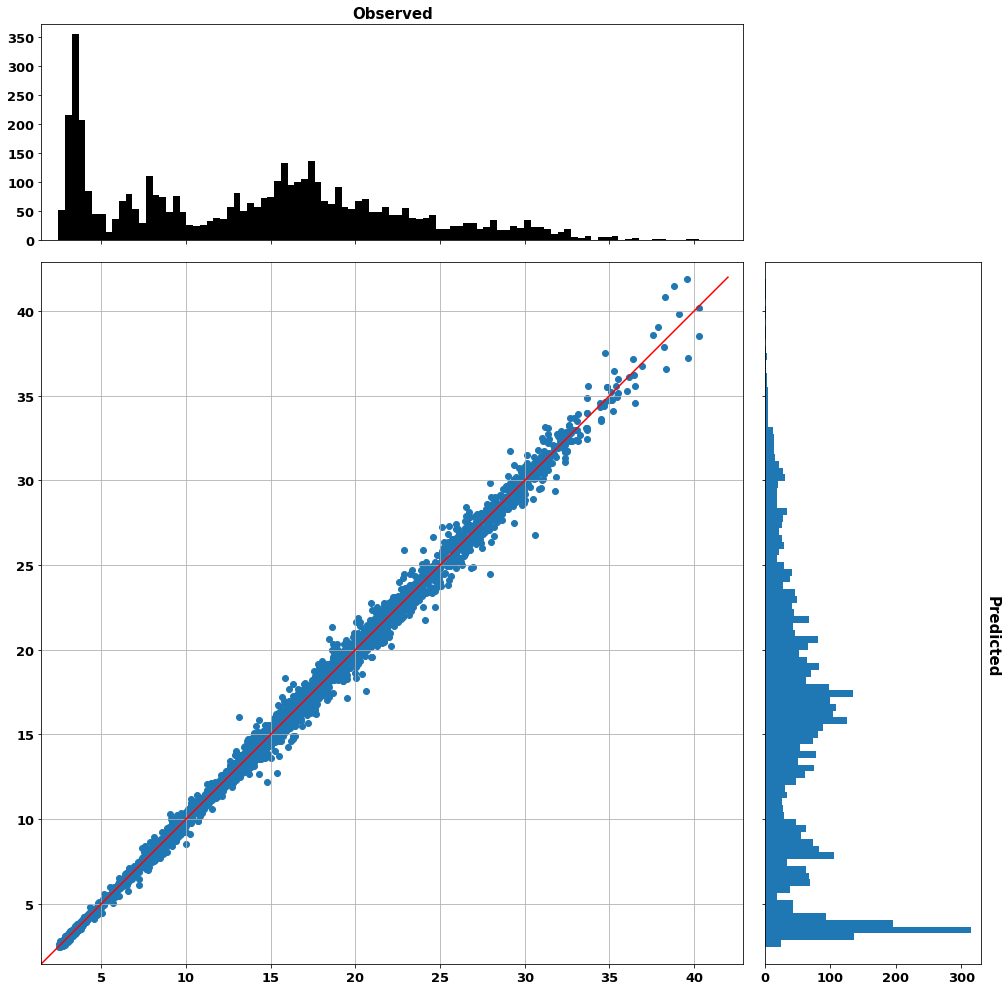

In [9]:
scatterHist(df['Close'], df['Close_trend'], nBins = 100)